Star Constellations Data
              Star               RA              DEC  Magnitude
0           Sirius  06h45m08.91728s  -16d42m58.0171s      -1.46
1          Canopus  06h23m57.10988s  -52d41m44.3810s      -0.72
2  Rigil Kentaurus  14h39m36.49400s  -60d50m02.3737s      -0.27
3         Arcturus  14h15m39.67207s   19d10m56.6730s      -0.04
4             Vega  18h36m56.33635s   38d47m01.2802s       0.03


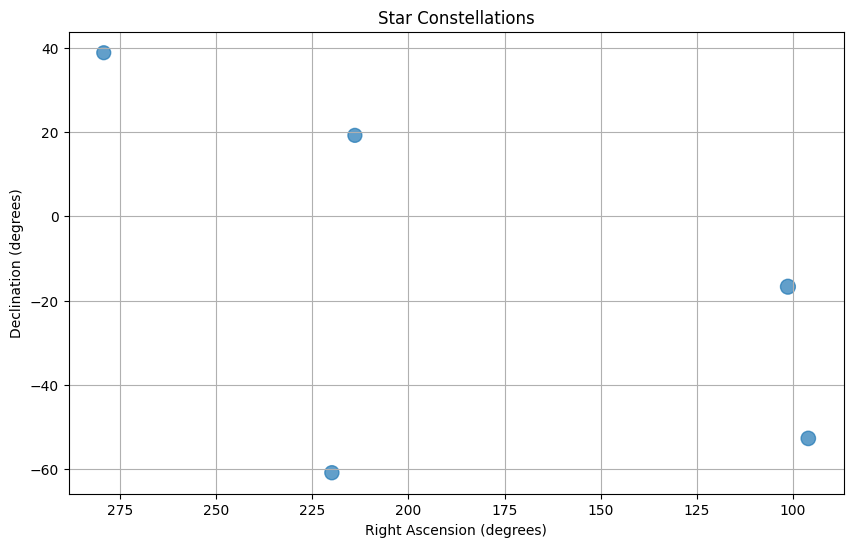

The brightest star is Sirius with a magnitude of -1.46.
The angular separation between Sirius and Canopus is 36.220787215509084 deg.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

data = {
    'Star': ['Sirius', 'Canopus', 'Rigil Kentaurus', 'Arcturus', 'Vega'],
    'RA': ['06h45m08.91728s', '06h23m57.10988s', '14h39m36.49400s', '14h15m39.67207s', '18h36m56.33635s'],
    'DEC': ['-16d42m58.0171s', '-52d41m44.3810s', '-60d50m02.3737s', '19d10m56.6730s', '38d47m01.2802s'],
    'Magnitude': [-1.46, -0.72, -0.27, -0.04, 0.03]
}

df = pd.DataFrame(data)

print("Star Constellations Data")
print(df)

df['SkyCoord'] = df.apply(lambda row: SkyCoord(row['RA'], row['DEC'], frame='icrs'), axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(
    [coord.ra.deg for coord in df['SkyCoord']],
    [coord.dec.deg for coord in df['SkyCoord']],
    s=[(10 - mag) * 10 for mag in df['Magnitude']], 
    alpha=0.7
)
plt.title('Star Constellations')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.grid(True)
plt.gca().invert_xaxis() 
plt.show()

brightest_star = df.loc[df['Magnitude'].idxmin()]
print(f"The brightest star is {brightest_star['Star']} with a magnitude of {brightest_star['Magnitude']}.")

star1 = SkyCoord(df.iloc[0]['RA'], df.iloc[0]['DEC'], frame='icrs')
star2 = SkyCoord(df.iloc[1]['RA'], df.iloc[1]['DEC'], frame='icrs')
separation = star1.separation(star2)

print(f"The angular separation between {df.iloc[0]['Star']} and {df.iloc[1]['Star']} is {separation}.")